In [1]:
import gymnasium as gym
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

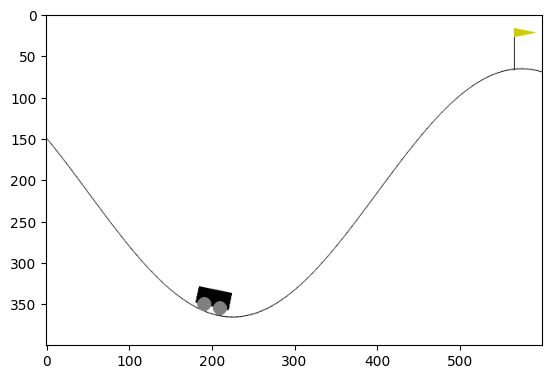

In [7]:
# make the env
env = gym.make("MountainCar-v0", render_mode='rgb_array')

# visualize the environment
env.reset()
plt.imshow(env.render()) 

In [ ]:
# observation space
# the position is between -1.2 to 0.6
# the velocity is between -0.07 to 0.07
env.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

In [9]:
# helper variables
num_position_bins = 30
num_velocity_bins = 20

# for calculating the needed steps in the bins
max_position = env.observation_space.high[0]
min_position = env.observation_space.low[0]
max_velocity = env.observation_space.high[1]
min_velocity = env.observation_space.low[1]

# create the bins for position and velocity separately
# first step, create the ranges between the bins by using LINSPACE
position_bins = np.linspace(min_position, max_position, num_position_bins)
velocity_bins = np.linspace(min_velocity, max_velocity, num_velocity_bins)

# second step, use NumPy's digitize in order to discretize our state space
positions = np.digitize(position_bins, bins=position_bins) - 1
velocities = np.digitize(velocity_bins, bins=velocity_bins) - 1

In [11]:
max_position, min_velocity

(np.float32(0.6), np.float32(-0.07))

In [12]:
max_velocity, min_velocity

(np.float32(0.07), np.float32(-0.07))

In [10]:
# how many states will we have in total
num_states = num_position_bins * num_velocity_bins
print(f"Number of possible states in Q-table: {num_states}")

Number of possible states in Q-table: 600
